# QUE HACER :


1. selecci√≥n de variables √≥ptima para el modelo.
2. Preprocesamiento adecuado y completo, adaptado a los objetivos de detecci√≥n de patrones; transformaci√≥n de variables y normalizaci√≥n aplicadas seg√∫n la t√©cnica de clustering seleccionada, detallando claramente los pasos.
3. Objetivos de detecci√≥n de patrones (m√≠nimo 3) bien definidos y alineados con el an√°lisis ambiental; descripci√≥n clara y l√≥gica de los objetivos y su relaci√≥n con los datos y la calidad del aire.
4. Pipelines correctamente implementados, integrando todas las etapas del flujo de trabajo (desde preprocesamiento hasta validaci√≥n); reutilizables y documentados claramente, con enfoque modular.
5. Ajuste de hiperpar√°metros aplicado mediante b√∫squeda aleatoria o exhaustiva, con resultados bien documentados; an√°lisis detallado del impacto en el rendimiento utilizando validaci√≥n cruzada.
6. Selecci√≥n y aplicaci√≥n de m√≠nimo 5 modelos diferentes para objetivos; selecci√≥n de t√©cnicas adecuada (ej. K-Means, DBSCAN, PCA), bien fundamentada y documentada; entrenamiento √≥ptimo con par√°metros ajustados a los datos y objetivos.
7. Validaci√≥n completa mediante √≠ndices internos (ej. Silhouette Score), externos (ej. Rand Index); an√°lisis profundo de cada √≠ndice y comparaci√≥n rigurosa entre modelos; documentaci√≥n clara y detallada.
8. Conclusiones claras y detalladas sobre cada objetivo y patrones encontrados; an√°lisis exhaustivo y propuestas de mejora o aplicaciones futuras; bien fundamentado con ejemplos y reflexiones relevantes sobre la calidad del aire.



# IMPORTS

In [9]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler


In [10]:
import pandas as pd

# lectura del csv
path = 'data/dataset.csv'
data = pd.read_csv(path) 
#exploracion de los datos 

data.info()
data.describe()
data.head(30)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10956 entries, 0 to 10955
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          10956 non-null  object 
 1   Ciudad        10956 non-null  object 
 2   NO (ƒÑg/m3)    10772 non-null  float64
 3   NO2 (ƒÑg/m3)   10723 non-null  float64
 4   NOX (ƒÑg/m3)   10731 non-null  float64
 5   PM10 (ƒÑg/m3)  8929 non-null   float64
 6   tavg          10950 non-null  float64
 7   tmin          10956 non-null  float64
 8   tmax          10956 non-null  float64
 9   prcp          10946 non-null  float64
 10  snow          283 non-null    float64
 11  wdir          8244 non-null   float64
 12  wspd          9522 non-null   float64
 13  wpgt          6301 non-null   float64
 14  pres          9139 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.3+ MB


Date  Ciudad  NO (ƒÑg/m3)  NO2 (ƒÑg/m3)  NOX (ƒÑg/m3)  PM10 (ƒÑg/m3)  \
0   2015-01-01  BILBAO        31.0         51.0         99.0           NaN   
1   2015-01-02  BILBAO        63.0         65.0        162.0           NaN   
2   2015-01-03  BILBAO        46.0         56.0        126.0          28.0   
3   2015-01-04  BILBAO        18.0         43.0         70.0          21.0   
4   2015-01-05  BILBAO        51.0         54.0        132.0          26.0   
5   2015-01-06  BILBAO        22.0         42.0         74.0          23.0   
6   2015-01-07  BILBAO        37.0         50.0        106.0          24.0   
7   2015-01-08  BILBAO        67.0         64.0        167.0          31.0   
8   2015-01-09  BILBAO        65.0         60.0        159.0          33.0   
9   2015-01-10  BILBAO        28.0         41.0         84.0          29.0   
10  2015-01-11  BILBAO         6.0         28.0         37.0          18.0   
11  2015-01-12  BILBAO         8.0         32.0         44.0           8.0   
12  2015-01-13  BILBAO         4.0         18.0         24.0           8.0   
13  2015-01-14  BILBAO        16.0         29.0         53.0          11.0   
14  2015-01-15  BILBAO         4.0         20.0         26.0           9.0   
15  2015-01-16  BILBAO         5.0         30.0         37.0           8.0   
16  2015-01-17  BILBAO         8.0         32.0         43.0          13.0   
17  2015-01-18  BILBAO         3.0         17.0         22.0           4.0   
18  2015-01-19  BILBAO         5.0         26.0         33.0          16.0   
19  2015-01-20  BILBAO        12.0         38.0         56.0           8.0   
20  2015-01-21  BILBAO         6.0         28.0         37.0           8.0   
21  2015-01-22  BILBAO         7.0         32.0         42.0          15.0   
22  2015-01-23  BILBAO        26.0         46.0         86.0          17.0   
23  2015-01-24  BILBAO        15.0         33.0         57.0          19.0   
24  2015-01-25  BILBAO        11.0         37.0         54.0          26.0   
25  2015-01-26  BILBAO        38.0         53.0        111.0          30.0   
26  2015-01-27  BILBAO         7.0         41.0         51.0          19.0   
27  2015-01-28  BILBAO        12.0         41.0         59.0          12.0   
28  2015-01-29  BILBAO         6.0         25.0         34.0          10.0   
29  2015-01-30  BILBAO         7.0         28.0         38.0          11.0   

    tavg  tmin  tmax  prcp  snow  wdir  wspd  wpgt  pres  
0    6.0  -1.3  16.0   0.0   NaN   NaN   NaN   NaN   NaN  
1    6.6  -0.9  15.8   0.0   NaN   NaN   NaN   NaN   NaN  
2    7.7   0.3  15.2   0.0   NaN   NaN   NaN   NaN   NaN  
3   11.3   7.3  13.7   0.0   NaN   NaN   NaN   NaN   NaN  
4    8.7   3.4  18.0   0.0   NaN   NaN   NaN   NaN   NaN  
5    9.7   6.0  11.8   0.0   NaN   NaN   NaN   NaN   NaN  
6    9.0   3.1  16.9   0.0   NaN   NaN   NaN   NaN   NaN  
7    9.7   2.5  15.0   0.0   NaN   NaN   NaN   NaN   NaN  
8   10.8   4.4  20.1   0.0   NaN   NaN   NaN   NaN   NaN  
9   10.1   4.5  12.9   1.2   NaN   NaN   NaN   NaN   NaN  
10  10.6   4.8  13.4   1.4   NaN   NaN   NaN   NaN   NaN  
11  11.7   1.8  17.8   0.0   NaN   NaN   NaN   NaN   NaN  
12  13.8  10.7  16.9   0.0   NaN   NaN   NaN   NaN   NaN  
13  11.8   5.3  16.0   0.0   NaN   NaN   NaN   NaN   NaN  
14  13.7   8.0  15.9   6.5   NaN   NaN   NaN   NaN   NaN  
15   8.1   5.3  10.6   7.7   NaN   NaN   NaN   NaN   NaN  
16   8.1   4.3  12.0   0.2   NaN   NaN   NaN   NaN   NaN  
17   9.3   5.4  12.8  10.5   NaN   NaN   NaN   NaN   NaN  
18   7.8   2.8  10.4   3.1   NaN   NaN   NaN   NaN   NaN  
19   6.4   3.2   9.3   4.6   NaN   NaN   NaN   NaN   NaN  
20   6.9   5.0   8.8  12.5   NaN   NaN   NaN   NaN   NaN  
21   7.7   2.6   9.8  15.4   NaN   NaN   NaN   NaN   NaN  
22   6.6   1.5  10.3   0.0   NaN   NaN   NaN   NaN   NaN  
23   6.1   0.0  10.7   2.4   NaN   NaN   NaN   NaN   NaN  
24   6.8   3.6  11.2   0.0   NaN   NaN   NaN   NaN   NaN  
25   8.2   4.4  10.0   5.6   NaN   NaN   NaN   NaN   

In [11]:
# Verificar valores faltantes con salida completa
missing_summary = data.isnull().sum()
print(missing_summary.to_string())



Date                0
Ciudad              0
NO (ƒÑg/m3)        184
NO2 (ƒÑg/m3)       233
NOX (ƒÑg/m3)       225
PM10 (ƒÑg/m3)     2027
tavg                6
tmin                0
tmax                0
prcp               10
snow            10673
wdir             2712
wspd             1434
wpgt             4655
pres             1817


# TRATAMIENTO DE DATASET 

1. A√±adir valores en campos nulos 

In [12]:
import pandas as pd

# Cargar el dataset (suponiendo que lo tienes en un archivo CSV)
df = pd.read_csv('data/dataset.csv')

# Aseg√∫rate de que las fechas est√°n en formato datetime
df['Date'] = pd.to_datetime(df['Date'])

# Funci√≥n para imputar los valores nulos por la media mensual de la ciudad
def imputar_mensual(df, ciudad, columna):
    for year in df['Date'].dt.year.unique():
        for month in range(1, 13):  # Iterar sobre los 12 meses
            # Filtrar por ciudad, a√±o y mes directamente desde la columna 'Date'
            subset = df[(df['Ciudad'] == ciudad) & 
                        (df['Date'].dt.year == year) & 
                        (df['Date'].dt.month == month)]
            
            # Si hay datos en ese mes para ese a√±o, usar la media de ese a√±o
            if not subset[columna].isnull().all():
                mean_value = subset[columna].mean()
            else:
                # Si no hay datos para ese mes en ese a√±o, calcular la media de otros a√±os
                subset_other_years = df[(df['Ciudad'] == ciudad) & 
                                        (df['Date'].dt.month == month) & 
                                        (df['Date'].dt.year != year)]
                mean_value = subset_other_years[columna].mean() if not subset_other_years.empty else None
            
            # Si se pudo calcular una media, redondearla a un decimal y usarla para imputar
            if mean_value is not None:
                mean_value = round(mean_value, 1)
                df.loc[(df['Ciudad'] == ciudad) & 
                       (df['Date'].dt.year == year) & 
                       (df['Date'].dt.month == month) & 
                       (df[columna].isnull()), columna] = mean_value
            
    return df

# Columnas a imputar
numerical_cols = ['NO (ƒÑg/m3)', 'NO2 (ƒÑg/m3)', 'NOX (ƒÑg/m3)', 'PM10 (ƒÑg/m3)', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'wpgt', 'pres']

# Imputar para cada ciudad y columna
for ciudad in df['Ciudad'].unique():
    for col in numerical_cols:
        df = imputar_mensual(df, ciudad, col)


# Eliminar solo la columna 'snow' tiene demasiados valores faltantes
if 'snow' in df.columns and df['snow'].isnull().any():
    df = df.drop(columns=['snow'])

# Verificar si a√∫n hay valores faltantes
print(df.isnull().sum())


Date            0
Ciudad          0
NO (ƒÑg/m3)      0
NO2 (ƒÑg/m3)     0
NOX (ƒÑg/m3)     0
PM10 (ƒÑg/m3)    0
tavg            0
tmin            0
tmax            0
prcp            0
wdir            0
wspd            0
wpgt            0
pres            0
dtype: int64


# DETECCI√ìN DE OUTLIERS
## 1. M√©todo del Rango Intercuart√≠lico (IQR)
Usaremos el m√©todo del IQR para detectar outliers en las columnas num√©ricas especificadas. El rango intercuart√≠lico es la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1). Los outliers se definen como valores que est√°n por debajo de Q1‚àí1.5√óIQR o por encima de Q3+1.5√óIQR.

In [13]:
import pandas as pd

# Funci√≥n para detectar outliers con IQR
def detectar_outliers_iqr(df, columnas):
    outliers = {}
    for col in columnas:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        
        # Detectar outliers
        outliers_col = df[(df[col] < limite_inferior) | (df[col] > limite_superior)]
        outliers[col] = outliers_col
    return outliers

# Aplicar la funci√≥n a las columnas num√©ricas
outliers_iqr = detectar_outliers_iqr(df, numerical_cols)

# Mostrar los outliers encontrados
for col, data in outliers_iqr.items():
    if not data.empty:
        print(f"Outliers en la columna {col}:")
        print(data[[col]])
        print("\n")
    else:
        print(f"No se encontraron outliers en la columna {col}\n")

Outliers en la columna NO (ƒÑg/m3):
       NO (ƒÑg/m3)
0            31.0
1            63.0
2            46.0
4            51.0
6            37.0
...           ...
10614        26.0
10617        29.0
10909        37.0
10936        28.0
10951        28.0

[1274 rows x 1 columns]


Outliers en la columna NO2 (ƒÑg/m3):
       NO2 (ƒÑg/m3)
1             65.0
2             56.0
4             54.0
7             64.0
8             60.0
...            ...
10201         74.0
10202         63.0
10207         85.0
10208         57.0
10216         66.0

[275 rows x 1 columns]


Outliers en la columna NOX (ƒÑg/m3):
       NOX (ƒÑg/m3)
0             99.0
1            162.0
2            126.0
4            132.0
5             74.0
...            ...
10617         74.0
10909         86.0
10923         71.0
10936         80.0
10951         71.0

[629 rows x 1 columns]


Outliers en la columna PM10 (ƒÑg/m3):
       PM10 (ƒÑg/m3)
64             40.0
68             39.0
69             45.0
70             51

### 2. M√©todo Z-score

El Z-score mide cu√°ntas desviaciones est√°ndar se encuentra un valor respecto a la media. Los outliers son aquellos valores cuyo Z-score es mayor que 3 o menor que -3.

In [14]:
from scipy.stats import zscore
# Funci√≥n para detectar outliers con Z-score
def detectar_outliers_zscore(df, columnas):
    outliers = {}
    for col in columnas:
        z_scores = zscore(df[col])
        
        # Detectar outliers donde el Z-score es mayor a 3 o menor a -3
        outliers_col = df[(z_scores > 3) | (z_scores < -3)]
        outliers[col] = outliers_col
    return outliers

# Aplicar la funci√≥n a las columnas num√©ricas
outliers_zscore = detectar_outliers_zscore(df, numerical_cols)

# Mostrar los outliers encontrados
for col, data in outliers_zscore.items():
    if not data.empty:
        print(f"Outliers en la columna {col} seg√∫n Z-score:")
        print(data[[col]])
        print("\n")
    else:
        print(f"No se encontraron outliers en la columna {col} seg√∫n Z-score\n")

Outliers en la columna NO (ƒÑg/m3) seg√∫n Z-score:
      NO (ƒÑg/m3)
1           63.0
7           67.0
8           65.0
334         71.0
335         97.0
...          ...
7638        70.0
7639        74.0
8019        72.0
8031        98.0
8731        62.0

[275 rows x 1 columns]


Outliers en la columna NO2 (ƒÑg/m3) seg√∫n Z-score:
       NO2 (ƒÑg/m3)
1             65.0
7             64.0
335           67.0
1471          63.0
1516          65.0
...            ...
10199         79.0
10201         74.0
10202         63.0
10207         85.0
10216         66.0

[162 rows x 1 columns]


Outliers en la columna NOX (ƒÑg/m3) seg√∫n Z-score:
      NOX (ƒÑg/m3)
1           162.0
2           126.0
4           132.0
6           106.0
7           167.0
...           ...
8744        132.0
8808        109.0
8821        141.0
9137        109.0
9461        138.0

[206 rows x 1 columns]


Outliers en la columna PM10 (ƒÑg/m3) seg√∫n Z-score:
       PM10 (ƒÑg/m3)
70             51.0
241            55.0
67

# Normalizar 

In [15]:
# Normalizar
scaler = MinMaxScaler()

# Normalizar los datos num√©ricos
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Mostrar el resultado
print(df_normalized)

TypeError: float() argument must be a string or a real number, not 'Timestamp'

¬°Perfecto! Si deseas usar solo las variables **m√°s correlacionadas** como variables independientes (**X**), debemos identificar cu√°les tienen una fuerte relaci√≥n con los **4 gases** (NO, NO‚ÇÇ, NOX, PM10). 

### üîé **Selecci√≥n de Variables Independientes (X) M√°s Correlacionadas**

Bas√°ndonos en los an√°lisis visuales previos y lo que generalmente influye en la contaminaci√≥n, las variables m√°s correlacionadas suelen ser:

1. **Temperatura:**  
   - **tavg** (Temperatura promedio) ‚Üí **Correlaci√≥n negativa** con NO, NO‚ÇÇ y NOX.  
   - **tmin** y **tmax** podr√≠an incluirse si muestran correlaci√≥n significativa.

2. **Velocidad del viento:**  
   - **wspd** (Velocidad del viento) ‚Üí **Correlaci√≥n negativa** con los gases (dispersa contaminantes).  
   - **wpgt** (R√°fagas de viento) ‚Üí Similar efecto.

3. **Precipitaci√≥n:**  
   - **prcp** (Precipitaci√≥n) ‚Üí **Correlaci√≥n negativa** con part√≠culas PM10 (la lluvia limpia el aire).

4. **Presi√≥n atmosf√©rica:**  
   - **pres** ‚Üí **Correlaci√≥n positiva** con NO y NO‚ÇÇ (presiones altas pueden estancar el aire).

---

### ‚úÖ **Variables Independientes (X) Recomendadas**

**X = ['tavg', 'wspd', 'prcp', 'pres']**

Estas son las m√°s relevantes por su correlaci√≥n y efecto f√≠sico sobre los contaminantes.  
Si quieres ser m√°s preciso, puedo generar el c√°lculo exacto de correlaciones. ¬øQuieres que lo haga? üìä

# ONE - HOT ENCODING
Transformar variables categ√≥ricas (como Ciudad) con One-Hot Encoding.

In [38]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Lista de ciudades
ciudades = ['BILBAO', 'GASTEIZ', 'SAN-SEBASTIAN']

# Crear un DataFrame
df = pd.DataFrame({'Ciudad': ciudades})

# Inicializar el OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Ajustar y transformar la columna 'ciudad'
encoded_data = encoder.fit_transform(df[['Ciudad']])

# Crear un DataFrame con las columnas correspondientes
df_encoded = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Ciudad']))

# Mostrar el resultado
print(df_encoded)


   Ciudad_BILBAO  Ciudad_GASTEIZ  Ciudad_SAN-SEBASTIAN
0            1.0             0.0                   0.0
1            0.0             1.0                   0.0
2            0.0             0.0                   1.0


# Selecci√≥n de variables √≥ptima para el modelo.

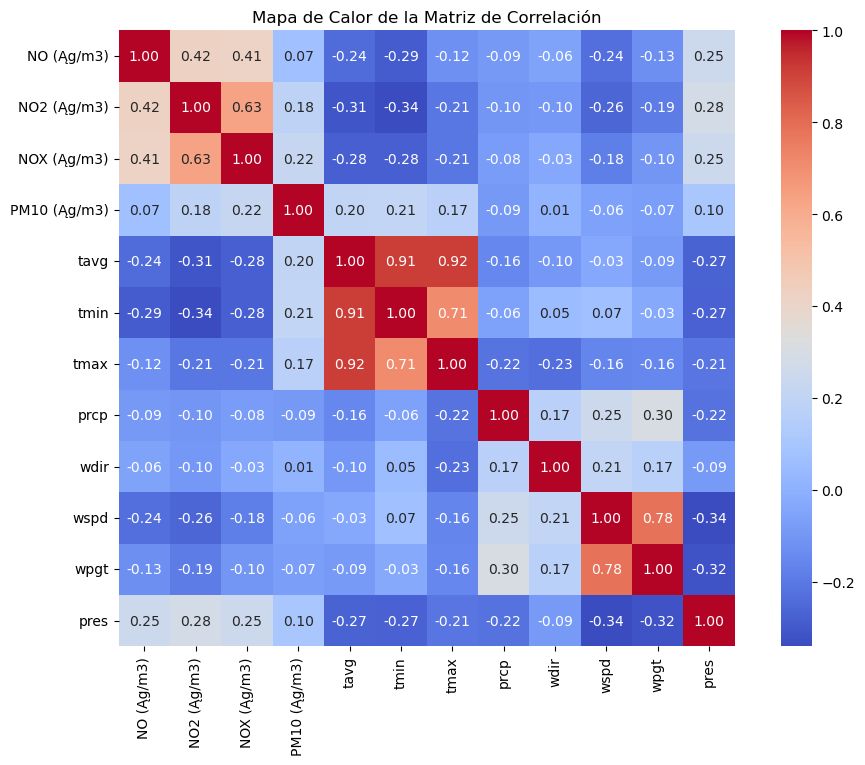

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Seleccionar solo las columnas num√©ricas
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

#Calcular la matriz de correlaci√≥n
correlation_matrix = numeric_columns.corr()

#Crear el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar=True)
plt.title("Mapa de Calor de la Matriz de Correlaci√≥n")
plt.show()

ESTE MAPA DE CORRELACION ESTA MAL. HAY QUE MIRAR EJ: SI CUANDO HACE MENOS DE 5 GRADOS HAY MAS CONTAMINTATE O NO. 

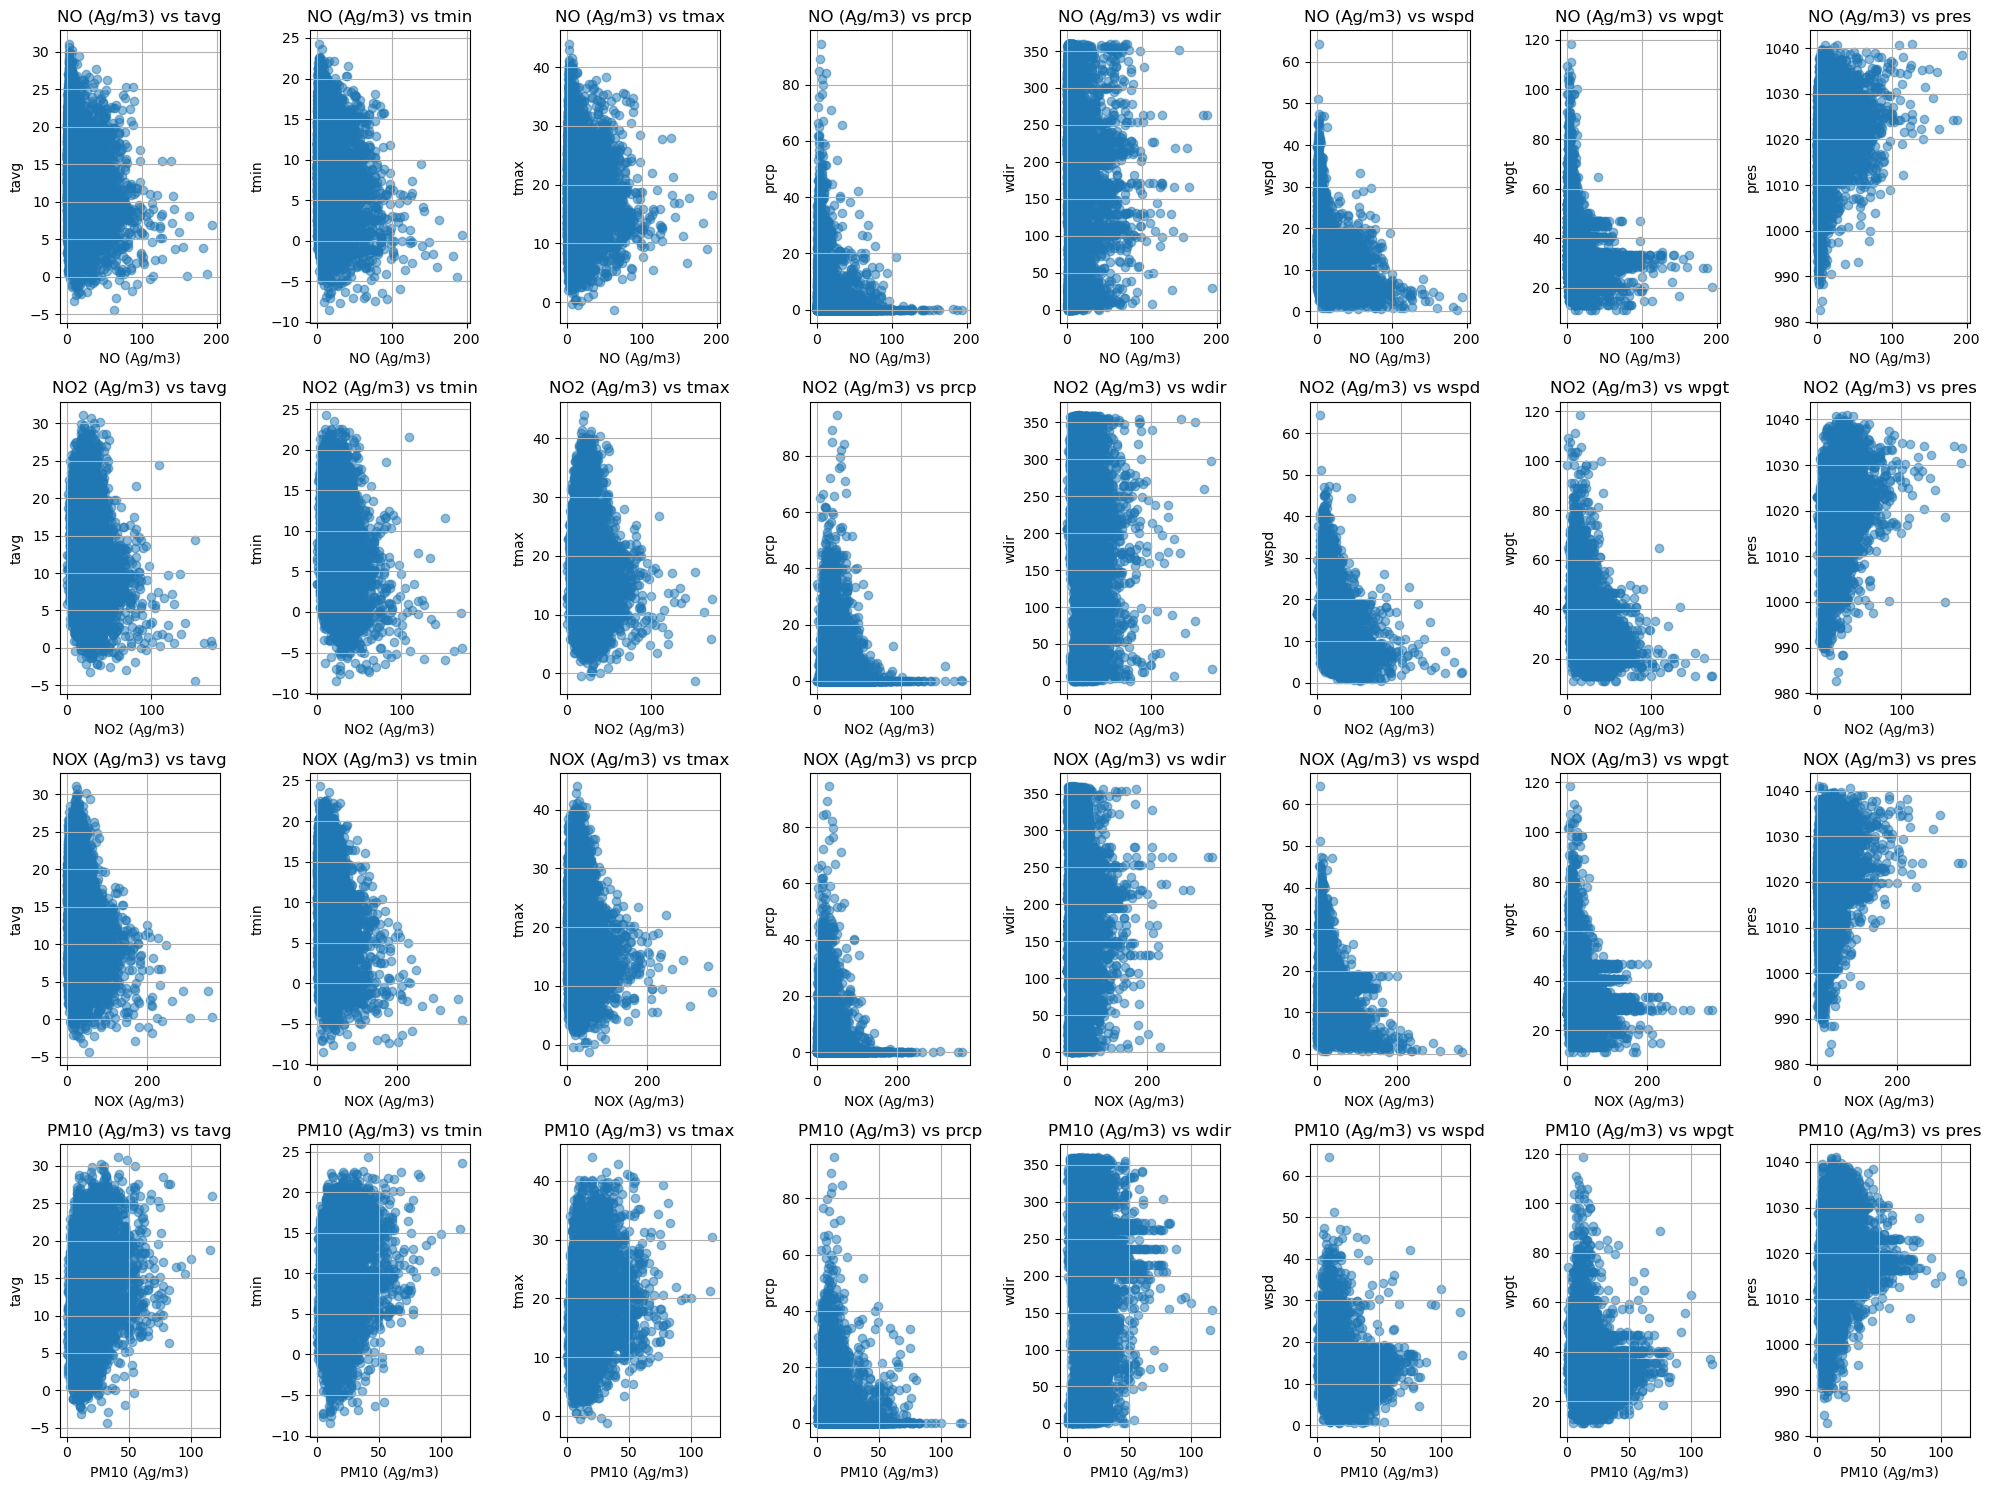

In [15]:

# Lista de gases y variables a analizar
gases = ['NO (ƒÑg/m3)', 'NO2 (ƒÑg/m3)', 'NOX (ƒÑg/m3)', 'PM10 (ƒÑg/m3)']
variables = ['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'wpgt', 'pres']

# Crear subgr√°ficos en una sola figura (4 filas y 8 columnas)
fig, axes = plt.subplots(4, 8, figsize=(20, 15))

# Aplanar la lista de ejes para facilitar el acceso
axes = axes.flatten()

# Crear gr√°ficos de dispersi√≥n para cada gas
index = 0
for gas in gases:
    for i, var in enumerate(variables):
        axes[index].scatter(df[gas], df[var], alpha=0.5)
        axes[index].set_title(f'{gas} vs {var}')
        axes[index].set_xlabel(gas)
        axes[index].set_ylabel(var)
        axes[index].grid(True)
        index += 1

# Ajustar el espaciado entre los subgr√°ficos
plt.tight_layout()

# Mostrar todos los gr√°ficos
plt.show()


Observando la matriz de gr√°ficos de dispersi√≥n, puedo identificar algunas correlaciones notables entre los gases contaminantes y las variables meteorol√≥gicas:

Correlaciones negativas (a mayor valor de la variable, menor concentraci√≥n de gases):
Temperatura promedio (tavg), m√≠nima (tmin) y m√°xima (tmax):

Los gases NO, NO2 y NOX presentan una clara correlaci√≥n negativa con estas variables. A mayor temperatura, las concentraciones de estos gases tienden a disminuir.
La relaci√≥n es m√°s pronunciada con NO y NOX.
Velocidad del viento (wspd) y r√°fagas de viento (wpgt):

Los contaminantes gaseosos (NO, NO2, NOX) muestran una tendencia a disminuir cuando aumenta la velocidad del viento. Esto sugiere que el viento ayuda a dispersar los contaminantes.
Correlaciones positivas (a mayor valor de la variable, mayor concentraci√≥n de gases):
Presi√≥n atmosf√©rica (pres):
Existe una ligera correlaci√≥n positiva entre NO, NO2 y NOX con la presi√≥n atmosf√©rica. A mayor presi√≥n, se observan mayores concentraciones de estos gases.
PM10 tambi√©n muestra una tendencia creciente con la presi√≥n, aunque menos marcada.
Relaciones d√©biles o dispersas:
Precipitaci√≥n (prcp):

No se observa una correlaci√≥n clara entre las concentraciones de gases y la precipitaci√≥n. Sin embargo, se nota que en presencia de precipitaci√≥n, las concentraciones de gases tienden a ser bajas, aunque de forma dispersa.
Esto puede deberse a la capacidad de la lluvia para limpiar el aire de part√≠culas y gases.
Direcci√≥n del viento (wdir):

La relaci√≥n entre la direcci√≥n del viento y los contaminantes no muestra un patr√≥n claro, como es com√∫n en variables circulares.
Material particulado PM10:

La relaci√≥n entre PM10 y las variables meteorol√≥gicas es m√°s dispersa. Se observa una leve disminuci√≥n con el aumento de la temperatura, pero menos pronunciada que en los otros gases.
Resumen de correlaciones destacadas:
Negativa: Temperatura (tavg, tmin, tmax) y velocidad del viento (wspd, wpgt) con NO, NO2, NOX.
Positiva: Presi√≥n atmosf√©rica (pres) con NO, NO2, NOX y, en menor medida, PM10.
D√©bil: Precipitaci√≥n (prcp) y direcci√≥n del viento (wdir) no muestran correlaciones fuertes.
¬øQuieres que realice un an√°lisis m√°s detallado o que proponga alg√∫n an√°lisis estad√≠stico para

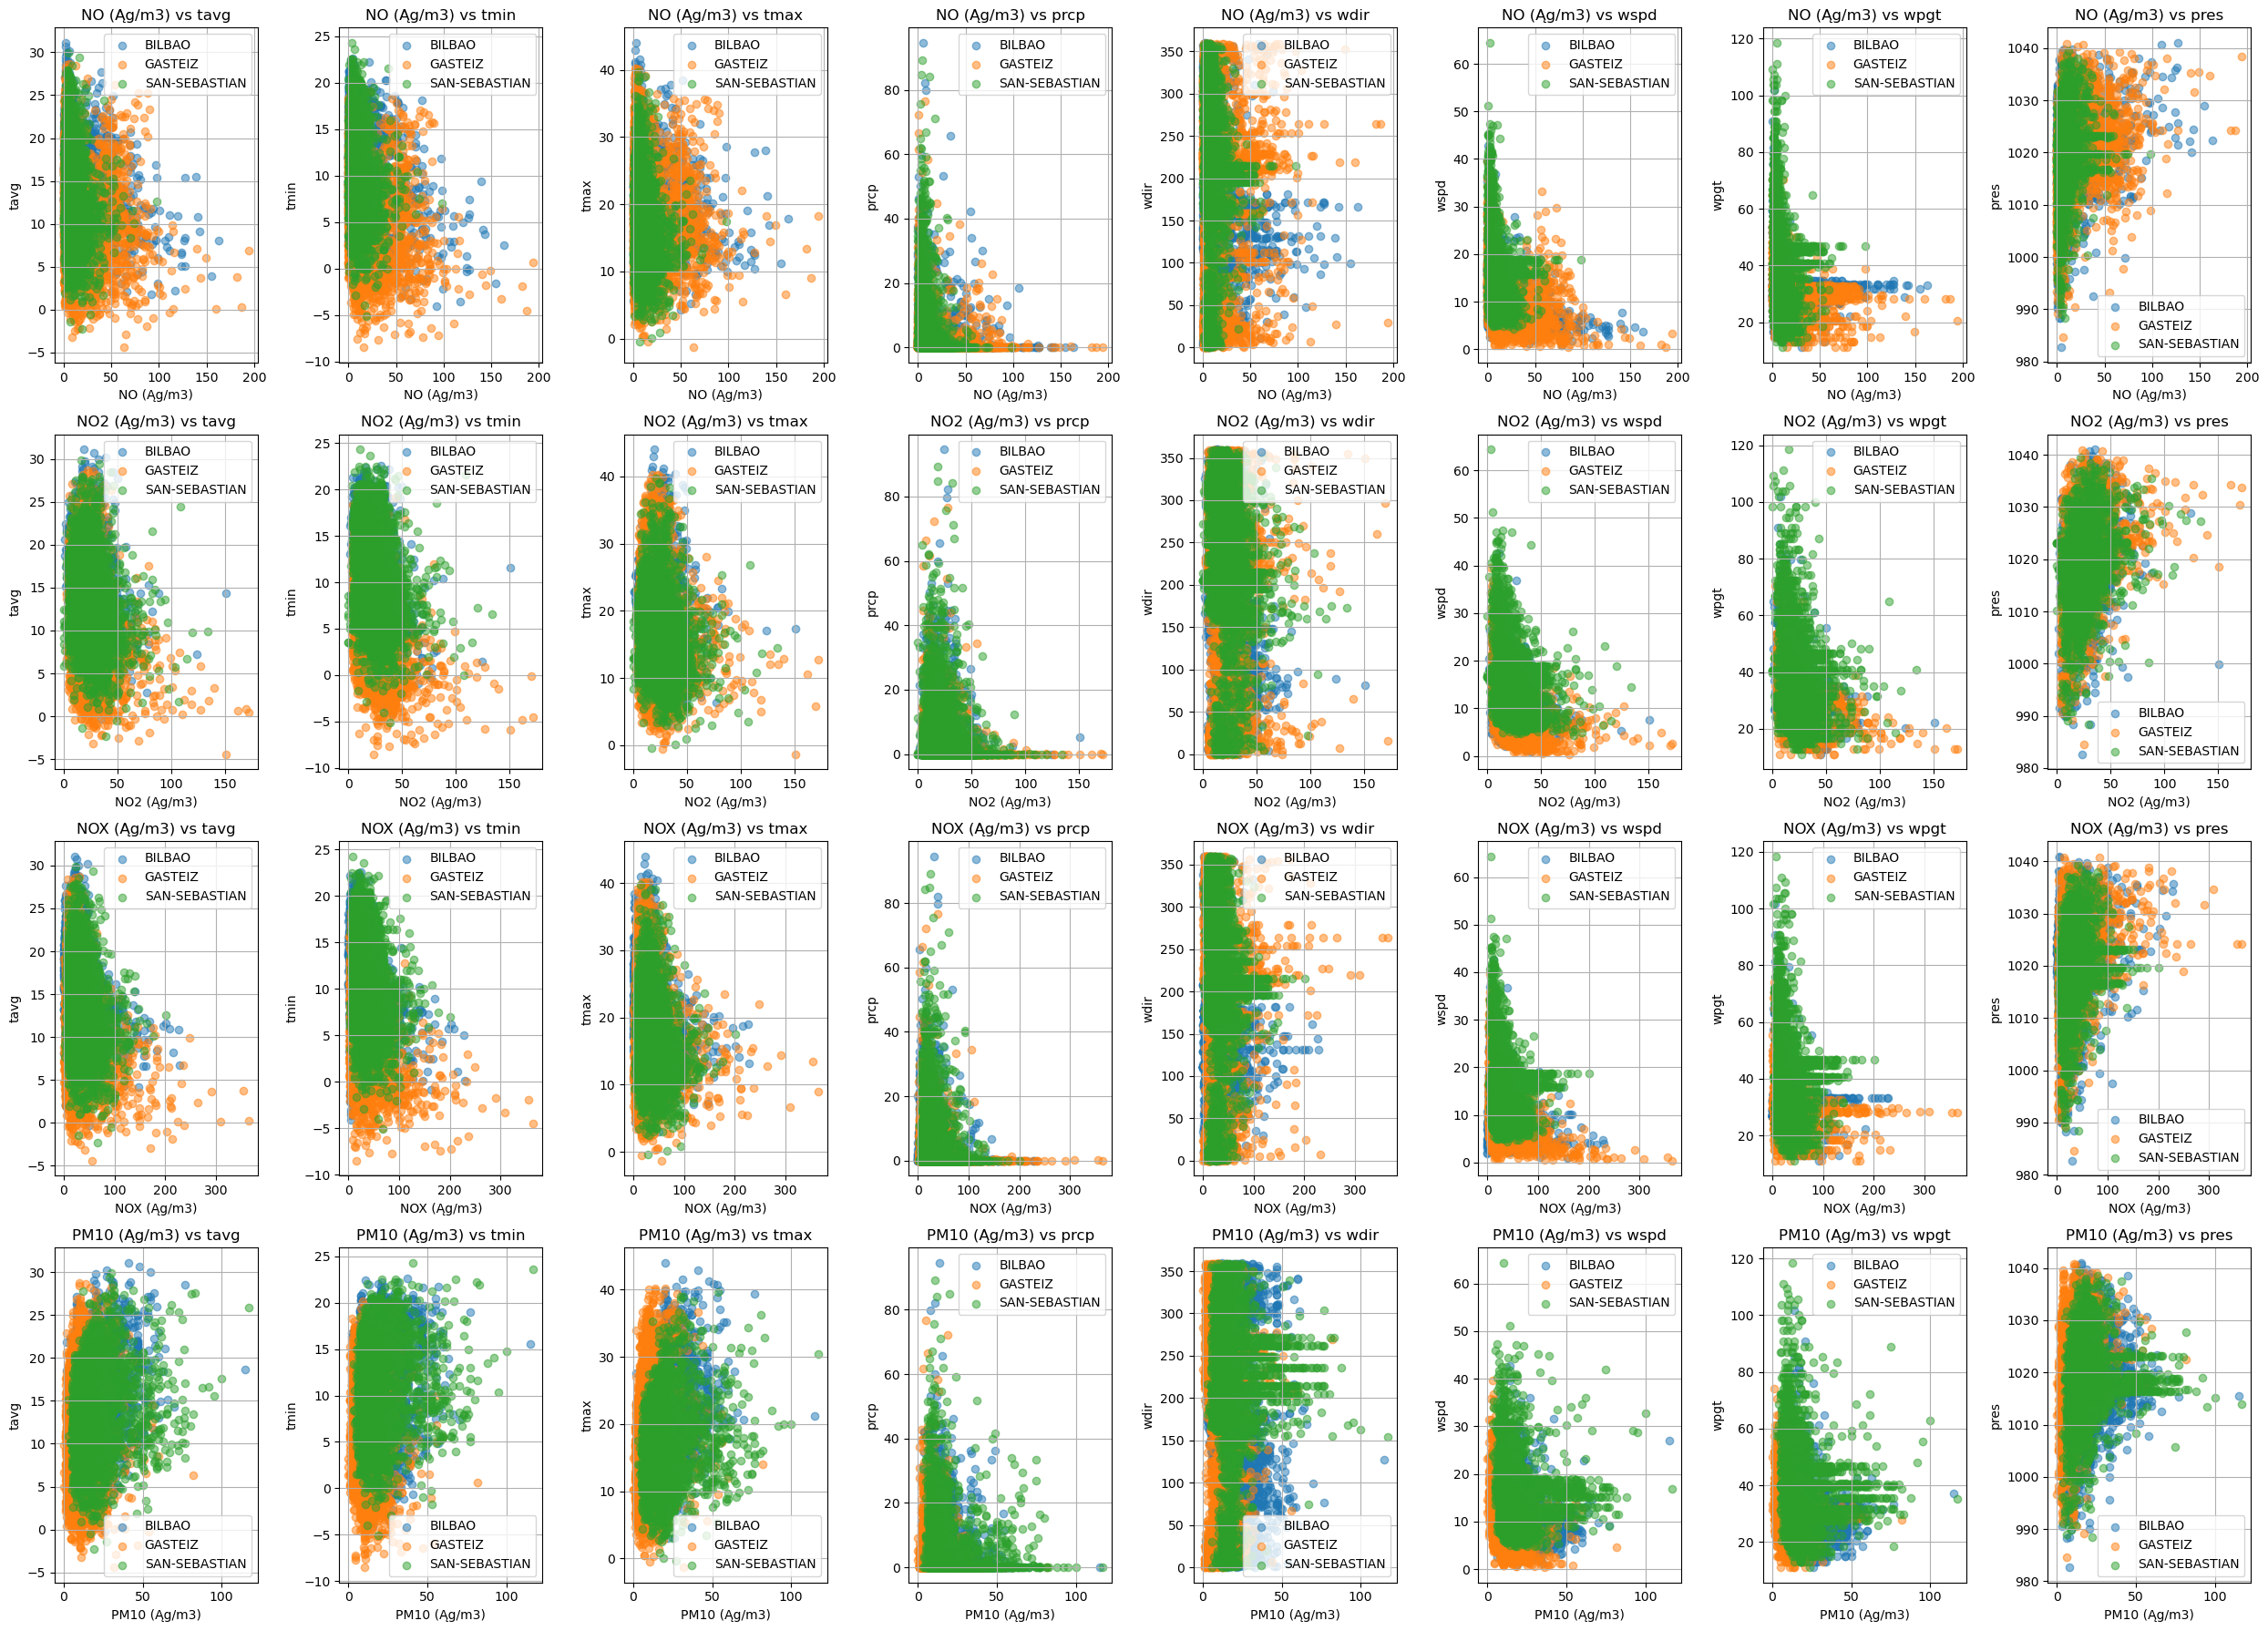

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de ciudades
ciudades = ['BILBAO', 'GASTEIZ', 'SAN-SEBASTIAN']

# Crear subgr√°ficos (4 filas y 8 columnas por ciudad)
fig, axes = plt.subplots(4, 8, figsize=(25, 18))

# Aplanar los ejes para facilitar el acceso
axes = axes.flatten()

# Crear gr√°ficos de dispersi√≥n separados por ciudad
index = 0
for gas in gases:
    for var in variables:
        for ciudad in ciudades:
            # Filtrar datos por ciudad
            df_ciudad = df[df['Ciudad'] == ciudad]
            
            # Graficar cada ciudad con diferente color
            axes[index].scatter(df_ciudad[gas], df_ciudad[var], alpha=0.5, label=ciudad)
        
        # T√≠tulos y etiquetas
        axes[index].set_title(f'{gas} vs {var}')
        axes[index].set_xlabel(gas)
        axes[index].set_ylabel(var)
        axes[index].grid(True)
        axes[index].legend()  # Leyenda para identificar las ciudades
        index += 1

# Ajustar el dise√±o
plt.tight_layout()
plt.show()


En los gr√°ficos de dispersi√≥n que muestras, se comparan los contaminantes atmosf√©ricos (**NO**, **NO‚ÇÇ**, **NOx**, **PM10**) con variables meteorol√≥gicas (**tavg**, **tmin**, **tmax**, **prcp**, **wdir**, **wspd**, **wpgt**, **pres**) para tres ciudades: **Bilbao**, **Gazteis** y **San Sebasti√°n**. Cada ciudad est√° representada con un color diferente:

- **Bilbao** ‚Üí Azul  
- **Gazteis** ‚Üí Naranja  
- **San Sebasti√°n** ‚Üí Verde  

### üîé **An√°lisis de Correlaciones Visuales**

1. **Relaci√≥n Inversa con Temperatura (tavg, tmin, tmax):**  
   - Se observa una **correlaci√≥n negativa** entre los gases **NO**, **NO‚ÇÇ**, y **NOx** con las temperaturas (**tavg**, **tmin**, **tmax**) en todas las ciudades.  
   - A menor temperatura, las concentraciones de estos gases tienden a ser mayores.  

2. **Relaci√≥n con Precipitaci√≥n (prcp):**  
   - La **precipitaci√≥n** parece tener un efecto de dispersi√≥n de contaminantes.  
   - A mayor **prcp**, las concentraciones de **NO**, **NO‚ÇÇ**, y **NOx** disminuyen, aunque en **San Sebasti√°n** (verde) se nota m√°s dispersi√≥n.  

3. **Relaci√≥n con la Velocidad del Viento (wspd, wpgt):**  
   - Existe una **relaci√≥n negativa**: a mayor **velocidad del viento**, menores concentraciones de contaminantes.  
   - **San Sebasti√°n** presenta valores m√°s dispersos, posiblemente por su proximidad al mar.  

4. **Direcci√≥n del Viento (wdir):**  
   - No parece haber una relaci√≥n clara entre la **direcci√≥n del viento** y los contaminantes. La distribuci√≥n es dispersa.  

5. **Presi√≥n Atmosf√©rica (pres):**  
   - A mayor **presi√≥n atmosf√©rica**, tienden a concentrarse m√°s los contaminantes (**NO**, **NO‚ÇÇ**, **NOx**).  
   - Esto es m√°s evidente en **Gazteis** y **Bilbao**.  

6. **Comportamiento del PM10:**  
   - **PM10** no muestra una tendencia clara con la temperatura, pero parece tener m√°s valores altos en **San Sebasti√°n** (verde).  
   - Hay mayor dispersi√≥n de **PM10** en comparaci√≥n con los gases.

---

### üåÜ **Comparaci√≥n entre Ciudades**

- **Bilbao (Azul):**  
  - Presenta **altas concentraciones** de **NO**, **NO‚ÇÇ** y **NOx** a bajas temperaturas.  
  - La influencia del viento reduce los niveles de contaminantes.

- **Gazteis (Naranja):**  
  - Muestra **niveles moderados** de contaminantes, con patrones similares a Bilbao, pero con menor dispersi√≥n.  
  - La presi√≥n atmosf√©rica parece tener un impacto m√°s notable.

- **San Sebasti√°n (Verde):**  
  - Muestra **mayor dispersi√≥n** en los valores, especialmente en **PM10**.  
  - La cercan√≠a al mar y mayores vientos podr√≠an explicar la variabilidad.

---

### üìä **Siguientes Pasos Sugeridos**

1. **Mapa de Calor de Correlaci√≥n:** Para cuantificar estas relaciones.  
2. **Boxplots por Ciudad:** Para comparar medianas y distribuciones de contaminantes.  
3. **An√°lisis Temporal:** Ver si estas relaciones cambian seg√∫n la estaci√≥n del a√±o.  



# entrenar

In [25]:
from sklearn.preprocessing import StandardScaler
# 3Ô∏è‚É£ Selecci√≥n de Variables Basada en Correlaci√≥n
variables_interes = ['tavg', 'wspd', 'prcp', 'pres']
X = df[variables_interes]
y = df[['NO (ƒÑg/m3)', 'NO2 (ƒÑg/m3)', 'NOX (ƒÑg/m3)', 'PM10 (ƒÑg/m3)']]

# 4Ô∏è‚É£ Preprocesamiento: Normalizaci√≥n de Datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)


[[-1.41440036 -0.25954611 -0.43186277  0.60447623]
 [-1.30674034 -0.25954611 -0.43186277  0.60447623]
 [-1.10936364 -0.25954611 -0.43186277  0.60447623]
 ...
 [-1.03759029 -0.66655781 -0.43186277  1.63385348]
 [-1.36057035 -0.75135191 -0.43186277  1.56236895]
 [-1.55794705 -0.88702248 -0.43186277  1.6910411 ]]


In [31]:
import pandas as pd

# Cargar el dataset (suponiendo que lo tienes en un archivo CSV)
df = pd.read_csv('data/dataset.csv')

# Aseg√∫rate de que las fechas est√°n en formato datetime
df['Date'] = pd.to_datetime(df['Date'])

# Funci√≥n para imputar los valores nulos por la media mensual de la ciudad
def imputar_mensual(df, ciudad, columna):
    for year in df['Date'].dt.year.unique():
        for month in range(1, 13):  # Iterar sobre los 12 meses
            # Filtrar por ciudad, a√±o y mes directamente desde la columna 'Date'
            subset = df[(df['Ciudad'] == ciudad) & 
                        (df['Date'].dt.year == year) & 
                        (df['Date'].dt.month == month)]
            
            # Si hay datos en ese mes para ese a√±o, usar la media de ese a√±o
            if not subset[columna].isnull().all():
                mean_value = subset[columna].mean()
            else:
                # Si no hay datos para ese mes en ese a√±o, calcular la media de otros a√±os
                subset_other_years = df[(df['Ciudad'] == ciudad) & 
                                        (df['Date'].dt.month == month) & 
                                        (df['Date'].dt.year != year)]
                mean_value = subset_other_years[columna].mean() if not subset_other_years.empty else None
            
            # Si se pudo calcular una media, redondearla a un decimal y usarla para imputar
            if mean_value is not None:
                mean_value = round(mean_value, 1)
                df.loc[(df['Ciudad'] == ciudad) & 
                       (df['Date'].dt.year == year) & 
                       (df['Date'].dt.month == month) & 
                       (df[columna].isnull()), columna] = mean_value
            
    return df

# Columnas a imputar
numerical_cols = ['NO (ƒÑg/m3)', 'NO2 (ƒÑg/m3)', 'NOX (ƒÑg/m3)', 'PM10 (ƒÑg/m3)', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'wpgt', 'pres']

# Imputar para cada ciudad y columna
for ciudad in df['Ciudad'].unique():
    for col in numerical_cols:
        df = imputar_mensual(df, ciudad, col)


# Eliminar solo la columna 'snow' tiene demasiados valores faltantes
if 'snow' in df.columns and df['snow'].isnull().any():
    df = df.drop(columns=['snow'])

# Verificar si a√∫n hay valores faltantes
print(df.isnull().sum())

Date            0
Ciudad          0
NO (ƒÑg/m3)      0
NO2 (ƒÑg/m3)     0
NOX (ƒÑg/m3)     0
PM10 (ƒÑg/m3)    0
tavg            0
tmin            0
tmax            0
prcp            0
wdir            0
wspd            0
wpgt            0
pres            0
dtype: int64


In [32]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score


# Separar caracter√≠sticas y objetivos
target_vars = ['NO (ƒÑg/m3)', 'NO2 (ƒÑg/m3)', 'NOX (ƒÑg/m3)', 'PM10 (ƒÑg/m3)']


# Normalizaci√≥n y One-Hot Encoding
numerical_features = ['tavg', 'wspd', 'prcp', 'pres']
categorical_features = ['Ciudad']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Aplicar el preprocesador
X = df[numerical_features + categorical_features]
Y = df[target_vars]

X_preprocessed = preprocessor.fit_transform(X)


In [33]:
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

# Crear pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clustering', KMeans(n_clusters=3, random_state=42))
])

# Ajustar el pipeline
pipeline.fit(X)

# Etiquetas de cluster
clusters = pipeline.named_steps['clustering'].labels_
df['Cluster'] = clusters
print(df[['Ciudad', 'Cluster']].head())


   Ciudad  Cluster
0  BILBAO        2
1  BILBAO        2
2  BILBAO        2
3  BILBAO        2
4  BILBAO        2


In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv('data/dataset.csv')

# Aseg√∫rate de que las fechas est√°n en formato datetime
df['Date'] = pd.to_datetime(df['Date'])

# Imputar valores nulos por la media mensual de la ciudad
def imputar_mensual(df, ciudad, columna):
    for year in df['Date'].dt.year.unique():
        for month in range(1, 13):
            subset = df[(df['Ciudad'] == ciudad) & 
                        (df['Date'].dt.year == year) & 
                        (df['Date'].dt.month == month)]
            if not subset[columna].isnull().all():
                mean_value = subset[columna].mean()
            else:
                subset_other_years = df[(df['Ciudad'] == ciudad) & 
                                        (df['Date'].dt.month == month) & 
                                        (df['Date'].dt.year != year)]
                mean_value = subset_other_years[columna].mean() if not subset_other_years.empty else None
            if mean_value is not None:
                mean_value = round(mean_value, 1)
                df.loc[(df['Ciudad'] == ciudad) & 
                       (df['Date'].dt.year == year) & 
                       (df['Date'].dt.month == month) & 
                       (df[columna].isnull()), columna] = mean_value
    return df

# Columnas a imputar
numerical_cols = ['NO (ƒÑg/m3)', 'NO2 (ƒÑg/m3)', 'NOX (ƒÑg/m3)', 'PM10 (ƒÑg/m3)', 
                  'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'wpgt', 'pres']

for ciudad in df['Ciudad'].unique():
    for col in numerical_cols:
        df = imputar_mensual(df, ciudad, col)

# Eliminar columna 'snow' si tiene demasiados valores faltantes
if 'snow' in df.columns and df['snow'].isnull().any():
    df = df.drop(columns=['snow'])



# Variables objetivo y caracter√≠sticas
target_vars = ['NO (ƒÑg/m3)', 'NO2 (ƒÑg/m3)', 'NOX (ƒÑg/m3)', 'PM10 (ƒÑg/m3)']
feature_vars = ['tavg', 'wspd', 'prcp', 'pres']

X = df[feature_vars + ['Ciudad']]
Y = df[target_vars]

# Preprocesamiento: Normalizaci√≥n y One-Hot Encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), feature_vars),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Ciudad'])
    ]
)

# Pipelines para clustering
clustering_models = {
    'KMeans': KMeans(n_clusters=4, random_state=42),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
    'Agglomerative': AgglomerativeClustering(n_clusters=4),
    'GaussianMixture': GaussianMixture(n_components=4, random_state=42)
}

for model_name, model in clustering_models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('clustering', model)
    ])
    pipeline.fit(X)
    clusters = pipeline.named_steps['clustering'].labels_ if hasattr(model, 'labels_') else pipeline.named_steps['clustering'].predict(X)
    df[f'Cluster_{model_name}'] = clusters
    if len(set(clusters)) > 1:
        sil_score = silhouette_score(preprocessor.transform(X), clusters)
        db_index = davies_bouldin_score(preprocessor.transform(X), clusters)
        print(f"{model_name} - Silhouette Score: {sil_score:.2f}, Davies-Bouldin Index: {db_index:.2f}")

# PCA para visualizaci√≥n
pca = PCA(n_components=2)
X_pca = pca.fit_transform(preprocessor.transform(X))
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster_KMeans', data=df, palette='viridis')
plt.title('Clustering Visualizado con PCA')
plt.show()

# Guardar el resultado final
df.to_csv('processed_data_with_clusters.csv', index=False)
print("Clustering completado y datos guardados.")


KMeans - Silhouette Score: 0.66, Davies-Bouldin Index: 0.67
DBSCAN - Silhouette Score: 0.80, Davies-Bouldin Index: 0.29
Agglomerative - Silhouette Score: 0.65, Davies-Bouldin Index: 0.72


ValueError: could not convert string to float: 'BILBAO'